# Quick intro to Jupyter notebook

- `ESC`: Command mode.
- `Enter`: Get into text mode.
- `Shift+Enter`: Execute and open new cell.
- `Ctrl+Enter`: Execute inplace.

## On command mode:
- `ESC+a`: cell above.
- `ESC+b`: cell below.
- `ESC+m`: Markdown mode.
- `ESC+dd`: eliminate cell.

## Autocompletion (code mode)
- `TAB`: autocomplete/after a ., access to methods and attributes.
- `Shift+TAB`: docstring.

# NetworkX basics

In [1]:
import networkx as nx

In [2]:
# Seed random number generator: have same visualization each time
import numpy as np
import random
seed = 123
np.random.seed(seed)
random.seed(seed)

In [3]:
G = nx.Graph()

In [4]:
G.add_node('A') # First node

In [5]:
G.add_nodes_from(['B', 'C']) # Add all nodes from a list

In [6]:
G.add_edge('A', 'B')

In [7]:
G.add_edges_from([('B','C'),('A', 'C')])

In [8]:
# Add edges without creating nodes explicitly
G.add_edge('A', 'E')

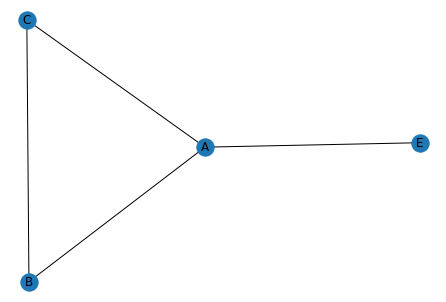

In [9]:
nx.draw(G, with_labels=True) # Shift + Tab give access to docstring.

# Example: Karate club (undirected networks)

In [10]:
G = nx.karate_club_graph() # Nodes: members, Edges: friendship

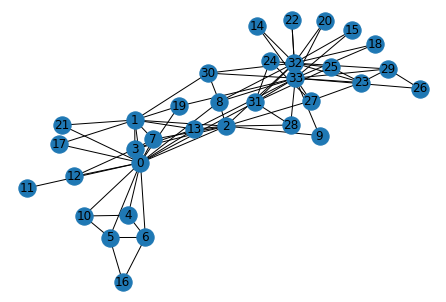

In [11]:
nx.draw(G, with_labels=True)

In [12]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [13]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [14]:
trainer = 0 # Karate instructor
president = 33 # Club president

In [15]:
list(G.neighbors(trainer)) # Friends of trainer

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [16]:
G.has_edge(trainer, president) # Verify if trainer and president are friends

False

In [17]:
G.nodes[trainer]

{'club': 'Mr. Hi'}

In [18]:
G.nodes[president]

{'club': 'Officer'}

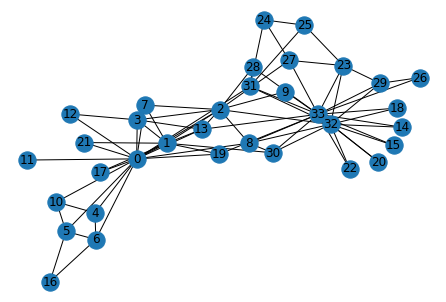

In [19]:
nx.draw(G, with_labels=True)

## Color different communities

In [20]:
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, #8 zeros, 2 1's
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1
]

In [21]:
# Modify the 'club' attribute for showing club membership
for node_id in G.nodes:
    G.nodes[node_id]['club'] = member_club[node_id]

In [22]:
G.nodes[trainer]

{'club': 0}

In [23]:
G.nodes[trainer]['role'] = 'Trainer'

In [24]:
G.nodes[trainer]

{'club': 0, 'role': 'Trainer'}

In [25]:
# Color the club by membership
node_color = [
        'green' if G.nodes[node_id]["club"] == 0 
        else 'blue' for node_id in G.nodes
             ]

In [26]:
node_color[trainer] = 'red'
node_color[president] = 'black'

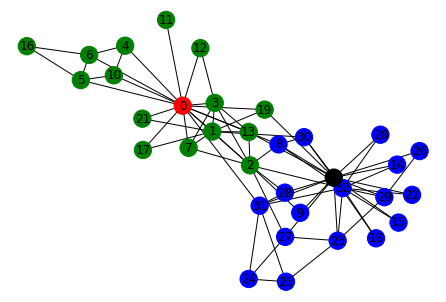

In [27]:
nx.draw(G, with_labels=True, node_color=node_color)

## Change edges attributes

**Idea:** Represent edges in the same community with one dash style (internal) and across communities (external).

In [28]:
for v, w in G.edges:
   # If v and w are from same club => internal else external
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v,w]["internal"] = True
    else:
        G.edges[v,w]["internal"] = False
    

In [29]:
G.edges[5,6]

{'internal': True}

In [30]:
G.edges[0,31]

{'internal': False}

In [31]:
# Define the style of the edges
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if not G.edges[e]["internal"]]

In [32]:
len(internal)

68

In [33]:
len(external)

10

In [34]:
# Position parameter
pos = nx.spring_layout(G)

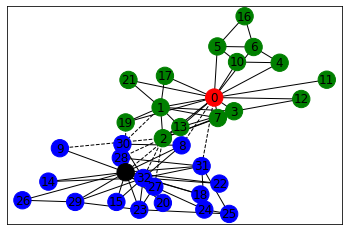

In [35]:
nx.draw_networkx_nodes(G, pos=pos, node_color=node_color)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos, edgelist=internal)
nx.draw_networkx_edges(G, pos=pos, edgelist=external, style='dashed')

## Tie strength

- **Idea:** Friends of friends are often our friends. The strength between $v$ and $w$ will be the number of neighbors in common.

In [37]:
def tie_strength(G, v, w):
    # Get v and w neighbors
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    
    
    n_common_neighbors = len(v_neighbors & w_neighbors)
    return 1 + n_common_neighbors

In [39]:
tie_strength(G, 29, 26)

2

In [41]:
list(G.neighbors(26))

[29, 33]

In [42]:
list(G.neighbors(29))

[23, 26, 32, 33]

In [43]:
for v, w in G.edges:
    G.edges[v,w]["weight"] = tie_strength(G, v, w)

In [44]:
G.edges[26,29]

{'internal': True, 'weight': 2}

In [45]:
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges] #list of weights of our edges

In [46]:
weighted_pos = nx.spring_layout(G, pos=pos, weight='weight')

In [49]:
import matplotlib.pyplot as plt

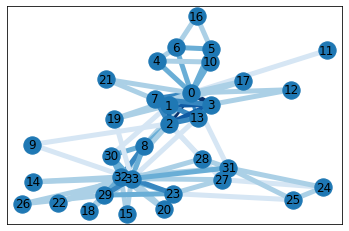

In [53]:
nx.draw_networkx(G, pos=weighted_pos, width=5,
                 #node_color=node_color,
                 edge_color=edge_weights, 
                 edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=6)

# Non-directed graphs: DiGraph Class

In [54]:
Gd = nx.read_gexf("./data/knecht2008/klas12b-net-1.gexf", node_type=int)

### Detour: visualization types

In [71]:
fd_pos = nx.spring_layout(G)
circ_pos = nx.circular_layout(G)
shell_pos = nx.shell_layout(G)

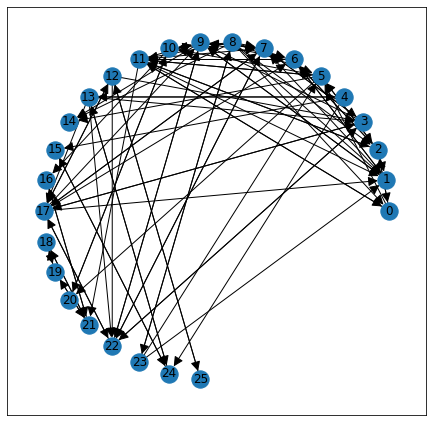

In [73]:
plt.figure(figsize=(7.5,7.5))
nx.draw_networkx(Gd, pos=shell_pos, arrowsize=20, with_labels=True)

In [56]:
Gd

In [59]:
list(Gd.neighbors(20))

[10]

In [60]:
list(Gd.successors(20))

[10]

In [61]:
list(Gd.predecessors(20))

[5, 10]